In [1]:
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
from datetime import datetime

import scipy.sparse
%matplotlib inline

### MNIST database of handwritten digits

https://keras.io/datasets/

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
# for digit in np.arange(0,10):
#     (x_train, y_train), (x_test, y_test) = mnist.load_data()

#     x_train = x_train[np.where(y_train == digit)]
#     x_test = x_test[np.where(y_test == digit)]

#     x_train = x_train.astype('float32') / 255
#     x_test = x_test.astype('float32') / 255

#     x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
#     x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#     x_train_file_path = os.path.join(r'E:\phd\ae\data\mnist\input', 'x_train_' + str(digit))
#     np.save(x_train_file_path, x_train) 

#     x_test_file_path = os.path.join(r'E:\phd\ae\data\mnist\input', 'x_test_' + str(digit))
#     np.save(x_test_file_path, x_test) 

#     print('x_train: {}'.format(x_train.shape[0]))
#     print('x_test: {}'.format(x_test.shape[0]))

### PCA

To calculate linear dimension of each digit we use a variable width window.  The number of features, the columns, 
in mnist for all digit is 784 (28 x 28).  Because each digit is different we run this experiment 100 times and take the average dimension for a fixed width. 

In [4]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from time import time
import random
from numpy.linalg import svd
from sklearn import manifold

In [5]:
def get_random_indexes(x_train, width):
    indexes = np.random.randint(0, len(x_train), size=width)
    indexes = sorted(indexes)
    return indexes

# -----------------------------------------------------------------------
# average the z values across the day
# see if the z_i >= threshold, in this 
# case 1%, we expect mean z is sent in
# -----------------------------------------------------------------------
def count_gt_threshold(z, threshold):
    tot = sum(z)
    z_pct = [(i/tot) for i in sorted(z, reverse=True)]
    z_gt_theta = [i for i in z_pct if i >= threshold]
    return len(z_gt_theta)

# -----------------------------------------------------------------------
# start adding the largest values first; keep adding 
# till you get 90%
# -----------------------------------------------------------------------
def count_upto_threshold(z, threshold):
    tot = sum(z)
    z_pct = [(i/tot) for i in sorted(z, reverse=True)]
    cum_z_pct = np.cumsum(z_pct)
    for i in range(0, cum_z_pct.shape[0]):
        if cum_z_pct[i] >= 0.9:
            return i+1
    return cum_z_pct.shape[0]

##### Rank of Matrix

In [6]:
digit = 0
file_path = r'E:\phd\ae\data\mnist\input\x_train_{}.npy'.format(digit)
x_train = np.load(file_path)

##### Digit 0, first 2 components

In [14]:
from sklearn.decomposition import TruncatedSVD

In [15]:
width = 60
row_indexes = get_random_indexes(x_train, width=width)
m = x_train[row_indexes,:]

In [34]:
svd = TruncatedSVD(n_components=2)
svd.fit(m)
result = svd.transform(m)
print(result[0:5, :])

[[ 7.2408586   0.21633822]
 [ 9.113282   -4.7845063 ]
 [10.2562895  -0.88158846]
 [ 8.746959   -1.759301  ]
 [10.524058   -3.29786   ]]


In [36]:
rows, cols = result[0:5, :].shape

In [44]:
#Get absolute maxes for axis ranges to center origin
#This is optional
maxes = 1.1*np.amax(abs(result[0:5, :]), axis=0)
colors = ['b','r','k', 'g', 'y']

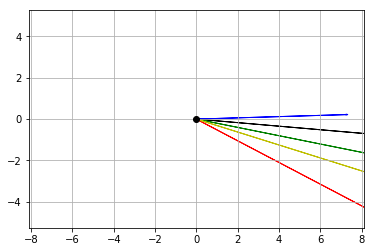

In [48]:
for i in range(0,rows):
#     plt.axes().arrow(0, 0, result[0, i], result[1, i], head_width=0.05, head_length=0.1, color=colors[i])
    plt.axes().arrow(0, 0, result[i][0], result[i][1], head_width=0.05, head_length=0.1, color=colors[i])
#     plt.axes().arrow(0, 0, 0, result[i][1], head_width=0.05, head_length=0.1, color=colors[i])

plt.plot(0,0,'ok') #<-- plot a black point at the origin
plt.axis('equal')  #<-- set the axes to the same scale
plt.xlim([-maxes[0],maxes[0]]) #<-- set the x axis limits
plt.ylim([-maxes[1],maxes[1]]) #<-- set the y axis limits
plt.grid(b=True, which='major') #<-- plot grid lines
plt.show()

In [58]:
M[]

array([[ 0,  1],
       [ 0,  1],
       [ 0, -2],
       [ 0,  2],
       [ 0,  4],
       [ 0, -7]])

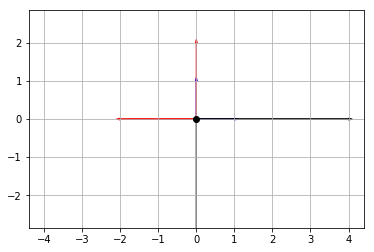

In [60]:
import numpy as np
import matplotlib.pyplot as plt
# M = np.array([[1,1],
#               [-2,2],
#               [4,-7]])

M = np.array([[1, 0],
              [0, 1],
              [-2, 0],
              [0, 2],
              [4, 0],
              [0, -7]])

rows,cols = M.T.shape

#Get absolute maxes for axis ranges to center origin
#This is optional
maxes = 1.1*np.amax(abs(M), axis = 0)
colors = ['b', 'b', 'r', 'r', 'k', 'k']


for i,l in enumerate(range(0,cols)):
    plt.axes().arrow(0,0,M[i,0],M[i,1],head_width=0.05,head_length=0.1,color = colors[i])

plt.plot(0,0,'ok') #<-- plot a black point at the origin
plt.axis('equal')  #<-- set the axes to the same scale

plt.xlim([-maxes[0],maxes[0]]) #<-- set the x axis limits
plt.ylim([-maxes[1],maxes[1]]) #<-- set the y axis limits

plt.grid(b=True, which='major') #<-- plot grid lines
plt.show()

In [50]:
cols

3

In [10]:
U, S, V = np.linalg.svd(m)


In [13]:
np.savetxt(r"C:\phd\meetings\2019-04-12\U_digit_0.csv", U, delimiter=",")
np.savetxt(r"C:\phd\meetings\2019-04-12\S_digit_0.csv", S, delimiter=",")
np.savetxt(r"C:\phd\meetings\2019-04-12\V_digit_0.csv", V, delimiter=",")

In [15]:
# width = 784
# row_indexes = get_random_indexes(x_train, width=width)
# m = x_train[row_indexes,:]

In [16]:
for w in np.arange(1, 90+1):    
    dims_gte = []
    dims_upto = []
    dims_s_sqr = []
    for i in np.arange(50):
        row_indexes = get_random_indexes(x_train, width=w)
        m = x_train[row_indexes,:]
        U, S, V = np.linalg.svd(m)
        S1 = sorted(S, reverse=True)
        S2 = np.extract(S1 > S1[0]*0.01, S1)
        
        dims_gte.append(count_gt_threshold(S2, threshold=0.01))
        dims_upto.append(count_upto_threshold(S2, threshold=0.9))
        dims_s_sqr.append(count_upto_threshold(S2**2, threshold=0.9))
        
    print('PCA, {}, {}, {}, {}, {}'.format(digit, 
                                   w, 
                                   int(np.mean(dims_gte)), 
                                   int(np.mean(dims_upto)),
                                int(np.mean(dims_s_sqr))))

PCA, 0, 1, 1, 1, 1
PCA, 0, 2, 2, 2, 1
PCA, 0, 3, 3, 3, 2
PCA, 0, 4, 4, 3, 2
PCA, 0, 5, 5, 4, 3
PCA, 0, 6, 6, 5, 3
PCA, 0, 7, 6, 5, 4
PCA, 0, 8, 8, 6, 4
PCA, 0, 9, 9, 7, 5
PCA, 0, 10, 10, 8, 5
PCA, 0, 11, 10, 8, 5
PCA, 0, 12, 12, 9, 5
PCA, 0, 13, 13, 10, 6
PCA, 0, 14, 14, 11, 6
PCA, 0, 15, 14, 11, 6
PCA, 0, 16, 15, 12, 7
PCA, 0, 17, 17, 13, 7
PCA, 0, 18, 17, 13, 7
PCA, 0, 19, 19, 14, 7
PCA, 0, 20, 19, 15, 7
PCA, 0, 21, 20, 16, 8
PCA, 0, 22, 21, 16, 8
PCA, 0, 23, 22, 17, 8
PCA, 0, 24, 23, 18, 8
PCA, 0, 25, 24, 18, 8
PCA, 0, 26, 25, 19, 9
PCA, 0, 27, 26, 20, 9
PCA, 0, 28, 27, 21, 9
PCA, 0, 29, 28, 21, 9
PCA, 0, 30, 29, 22, 9
PCA, 0, 31, 30, 23, 9
PCA, 0, 32, 30, 23, 10
PCA, 0, 33, 31, 24, 10
PCA, 0, 34, 31, 25, 10
PCA, 0, 35, 31, 26, 10
PCA, 0, 36, 32, 26, 10
PCA, 0, 37, 32, 27, 10
PCA, 0, 38, 32, 28, 10
PCA, 0, 39, 32, 28, 11
PCA, 0, 40, 32, 29, 11
PCA, 0, 41, 32, 30, 11
PCA, 0, 42, 32, 30, 11
PCA, 0, 43, 32, 31, 11
PCA, 0, 44, 32, 32, 11
PCA, 0, 45, 32, 32, 11
PCA, 0, 46, 32, 33, 11
PCA

In [93]:
r1 = x_train[0,:]

r1 = r1.reshape(28,28)

In [104]:
matrix.shape

(28, 28)

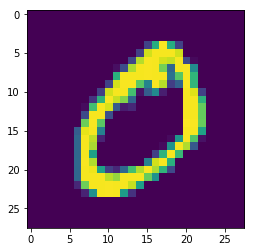

In [105]:
plt.imshow(matrix)

In [107]:
from sklearn.preprocessing import StandardScaler

In [108]:
scaler = StandardScaler()
scaler.fit(x_train)
train_img = scaler.transform(x_train)

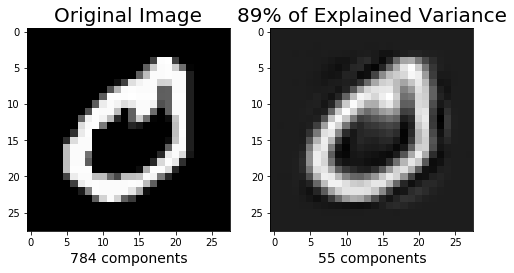

In [135]:
pct = 0.89
pca = PCA(pct)
lower_dimensional_data = pca.fit_transform(x_train)
# print('pca.n_components_: {}'.format(pca.n_components_))
approximation = pca.inverse_transform(lower_dimensional_data)

plt.figure(figsize=(8,4));

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(x_train[1].reshape(28,28), cmap = plt.cm.gray, interpolation='nearest');
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 154 principal components
plt.subplot(1, 2, 2);
plt.imshow(approximation[1, :].reshape(28, 28), cmap = plt.cm.gray, interpolation='nearest');
plt.xlabel('{} components'.format(pca.n_components_), fontsize = 14)
plt.title('{}% of Explained Variance'.format(int(pct*100)), fontsize = 20);

In [3]:
digit = 0
file_path = r'E:\phd\ae\data\mnist\input\x_train_{}.npy'.format(digit)
x_train = np.load(file_path)

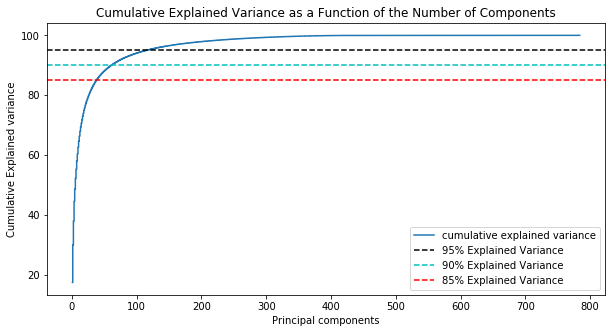

In [4]:
pca = PCA()
pca.fit(x_train)
tot = sum(pca.explained_variance_)
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
cum_var_exp = np.cumsum(var_exp)

# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.step(range(1, len(cum_var_exp)+1), cum_var_exp, where='mid',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.show()

In [5]:
# This is an extremely inefficient function. Will get to why in a later tutorial
def explainedVariance(percentage, images): 
    # percentage should be a decimal from 0 to 1 
    pca = PCA(percentage)
    pca.fit(images)
    components = pca.transform(images)
    approxOriginal = pca.inverse_transform(components)
    return approxOriginal, pca.n_components_

Text(0.5, 1.0, '65.0% of Explained Variance')

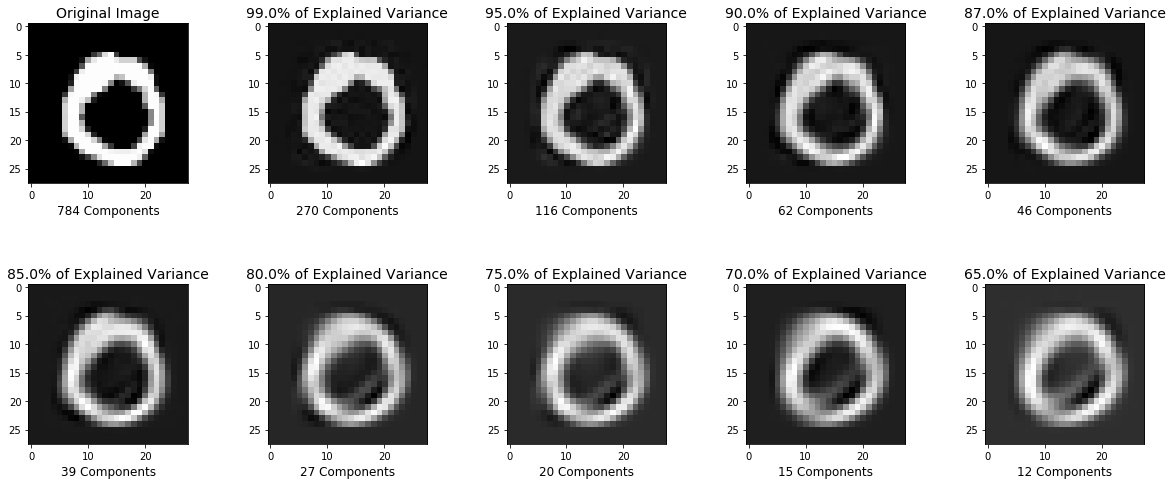

In [34]:
fig = plt.figure(figsize=(20,8))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Original Image (784 components)
plt.subplot(2, 5, 1)
plt.imshow(x_train[5].reshape(28,28), cmap = plt.cm.gray, interpolation='nearest')
plt.xlabel('784 Components', fontsize = 12)
plt.title('Original Image', fontsize = 14)

# ------------ 99% PCA ------------------
pct = 0.99
approxOriginal, n_components = explainedVariance(pct, x_train)
plt.subplot(2, 5, 2);
plt.imshow(approxOriginal[5].reshape(28, 28), cmap = plt.cm.gray, interpolation='nearest')
plt.xlabel('{} Components'.format(n_components), fontsize = 12)
plt.title('{}% of Explained Variance'.format(100*pct), fontsize = 14)

# ------------ 95% PCA ------------------
pct = 0.95
approxOriginal, n_components = explainedVariance(pct, x_train)
plt.subplot(2, 5, 3);
plt.imshow(approxOriginal[5].reshape(28, 28), cmap = plt.cm.gray, interpolation='nearest')
plt.xlabel('{} Components'.format(n_components), fontsize = 12)
plt.title('{}% of Explained Variance'.format(100*pct), fontsize = 14)

# ------------ 90% PCA ------------------
pct = 0.9
approxOriginal, n_components = explainedVariance(pct, x_train)
plt.subplot(2, 5, 4);
plt.imshow(approxOriginal[5].reshape(28, 28),cmap = plt.cm.gray, interpolation='nearest')
plt.xlabel('{} Components'.format(n_components), fontsize = 12)
plt.title('{}% of Explained Variance'.format(100*pct), fontsize = 14)

# ------------ 85% PCA ------------------
pct = 0.87
approxOriginal, n_components = explainedVariance(pct, x_train)
plt.subplot(2, 5, 5);
plt.imshow(approxOriginal[5].reshape(28, 28),cmap = plt.cm.gray, interpolation='nearest')
plt.xlabel('{} Components'.format(n_components), fontsize = 12)
plt.title('{}% of Explained Variance'.format(100*pct), fontsize = 14)



# Original Image (784 components)
pct = 0.85
approxOriginal, n_components = explainedVariance(pct, x_train)
plt.subplot(2, 5, 6);
plt.imshow(approxOriginal[5].reshape(28, 28),cmap = plt.cm.gray, interpolation='nearest')
plt.xlabel('{} Components'.format(n_components), fontsize = 12)
plt.title('{}% of Explained Variance'.format(100*pct), fontsize = 14)

# ------------ 99% PCA ------------------
pct = 0.80
approxOriginal, n_components = explainedVariance(pct, x_train)
plt.subplot(2, 5, 7);
plt.imshow(approxOriginal[5].reshape(28, 28), cmap = plt.cm.gray, interpolation='nearest')
plt.xlabel('{} Components'.format(n_components), fontsize = 12)
plt.title('{}% of Explained Variance'.format(100*pct), fontsize = 14)

# ------------ 95% PCA ------------------
pct = 0.75
approxOriginal, n_components = explainedVariance(pct, x_train)
plt.subplot(2, 5, 8);
plt.imshow(approxOriginal[5].reshape(28, 28), cmap = plt.cm.gray, interpolation='nearest')
plt.xlabel('{} Components'.format(n_components), fontsize = 12)
plt.title('{}% of Explained Variance'.format(100*pct), fontsize = 14)

# ------------ 90% PCA ------------------
pct = 0.70
approxOriginal, n_components = explainedVariance(pct, x_train)
plt.subplot(2, 5, 9);
plt.imshow(approxOriginal[5].reshape(28, 28),cmap = plt.cm.gray, interpolation='nearest')
plt.xlabel('{} Components'.format(n_components), fontsize = 12)
plt.title('{}% of Explained Variance'.format(100*pct), fontsize = 14)

# ------------ 85% PCA ------------------
pct = 0.65
approxOriginal, n_components = explainedVariance(pct, x_train)
plt.subplot(2, 5, 10);
plt.imshow(approxOriginal[5].reshape(28, 28),cmap = plt.cm.gray, interpolation='nearest')
plt.xlabel('{} Components'.format(n_components), fontsize = 12)
plt.title('{}% of Explained Variance'.format(100*pct), fontsize = 14)

In [30]:
import numpy as np
from numpy.linalg import svd

def rank(A, atol=1e-5, rtol=0):
    A = np.atleast_2d(A)
    s = svd(A, compute_uv=False)
    tol = max(atol, rtol * s[0])
    rank = int((s >= tol).sum())
    return rank

def nullspace(A, atol=1e-5, rtol=0):
    A = np.atleast_2d(A)
    u, s, vh = svd(A)
    tol = max(atol, rtol * s[0])
    nnz = (s >= tol).sum()
    ns = vh[nnz:].conj().T
    return ns

In [33]:
for width in np.arange(30, 91):
    matrix = x_train[0:width,:]
#     print('Shape: {} x {}'.format(matrix.shape[0], matrix.shape[1]))
    ns = nullspace(matrix)
#     print('nullity(matrix): {} x {}'.format(ns.shape[0], ns.shape[1]))
    print('Width: {} Dimension: {} Rank: {}'.format(width, (matrix.shape[1] - ns.shape[1]), rank(matrix)))

Width: 30 Dimension: 30 Rank: 30
Width: 31 Dimension: 31 Rank: 31
Width: 32 Dimension: 32 Rank: 32
Width: 33 Dimension: 33 Rank: 33
Width: 34 Dimension: 34 Rank: 34
Width: 35 Dimension: 35 Rank: 35
Width: 36 Dimension: 36 Rank: 36
Width: 37 Dimension: 37 Rank: 37
Width: 38 Dimension: 38 Rank: 38
Width: 39 Dimension: 39 Rank: 39
Width: 40 Dimension: 40 Rank: 40
Width: 41 Dimension: 41 Rank: 41
Width: 42 Dimension: 42 Rank: 42
Width: 43 Dimension: 43 Rank: 43
Width: 44 Dimension: 44 Rank: 44
Width: 45 Dimension: 45 Rank: 45
Width: 46 Dimension: 46 Rank: 46
Width: 47 Dimension: 47 Rank: 47
Width: 48 Dimension: 48 Rank: 48
Width: 49 Dimension: 49 Rank: 49
Width: 50 Dimension: 50 Rank: 50
Width: 51 Dimension: 51 Rank: 51
Width: 52 Dimension: 52 Rank: 52
Width: 53 Dimension: 53 Rank: 53
Width: 54 Dimension: 54 Rank: 54
Width: 55 Dimension: 55 Rank: 55
Width: 56 Dimension: 56 Rank: 56
Width: 57 Dimension: 57 Rank: 57
Width: 58 Dimension: 58 Rank: 58
Width: 59 Dimension: 59 Rank: 59
Width: 60 

In [23]:
ns.shape

(784, 724)

In [17]:
np.linalg.matrix_rank(x_train)

493

Text(0.5, 1.0, '30.0% of Explained Variance')

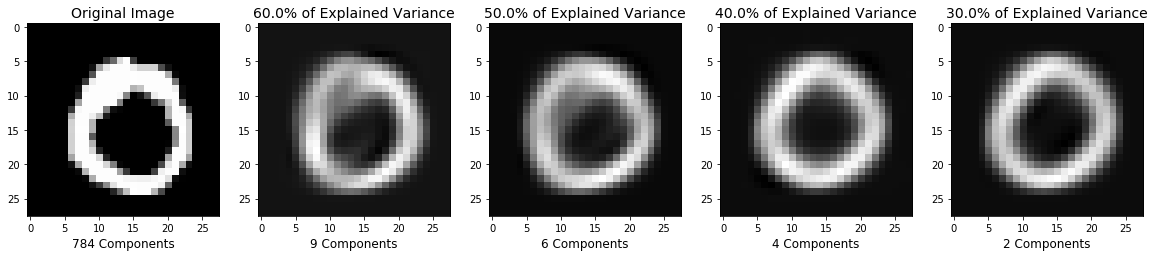

In [7]:
plt.figure(figsize=(20,4))

# Original Image (784 components)
plt.subplot(1, 5, 1)
plt.imshow(x_train[5].reshape(28,28), cmap = plt.cm.gray, interpolation='nearest')
plt.xlabel('784 Components', fontsize = 12)
plt.title('Original Image', fontsize = 14)

# ------------ 99% PCA ------------------
pct = 0.60
approxOriginal, n_components = explainedVariance(pct, x_train)
plt.subplot(1, 5, 2);
plt.imshow(approxOriginal[5].reshape(28, 28), cmap = plt.cm.gray, interpolation='nearest')
plt.xlabel('{} Components'.format(n_components), fontsize = 12)
plt.title('{}% of Explained Variance'.format(100*pct), fontsize = 14)

# ------------ 95% PCA ------------------
pct = 0.50
approxOriginal, n_components = explainedVariance(pct, x_train)
plt.subplot(1, 5, 3);
plt.imshow(approxOriginal[5].reshape(28, 28), cmap = plt.cm.gray, interpolation='nearest')
plt.xlabel('{} Components'.format(n_components), fontsize = 12)
plt.title('{}% of Explained Variance'.format(100*pct), fontsize = 14)

# ------------ 90% PCA ------------------
pct = 0.40
approxOriginal, n_components = explainedVariance(pct, x_train)
plt.subplot(1, 5, 4);
plt.imshow(approxOriginal[5].reshape(28, 28),cmap = plt.cm.gray, interpolation='nearest')
plt.xlabel('{} Components'.format(n_components), fontsize = 12)
plt.title('{}% of Explained Variance'.format(100*pct), fontsize = 14)

# ------------ 85% PCA ------------------
pct = 0.30
approxOriginal, n_components = explainedVariance(pct, x_train)
plt.subplot(1, 5, 5);
plt.imshow(approxOriginal[5].reshape(28, 28),cmap = plt.cm.gray, interpolation='nearest')
plt.xlabel('{} Components'.format(n_components), fontsize = 12)
plt.title('{}% of Explained Variance'.format(100*pct), fontsize = 14)

In [85]:
plt.figure(figsize=(20,4))

# Original Image (784 components)
plt.subplot(1, 5, 1)
plt.imshow(x_train[5].reshape(28,28), cmap = plt.cm.gray, interpolation='nearest')
plt.xlabel('784 Components', fontsize = 12)
plt.title('Original Image', fontsize = 14)

# ------------ 99% PCA ------------------
pct = 0.60
approxOriginal, n_components = explainedVariance(pct, x_train)
plt.subplot(1, 5, 2);
plt.imshow(approxOriginal[5].reshape(28, 28), cmap = plt.cm.gray, interpolation='nearest')
plt.xlabel('{} Components'.format(n_components), fontsize = 12)
plt.title('{}% of Explained Variance'.format(100*pct), fontsize = 14)

# ------------ 95% PCA ------------------
pct = 0.50
approxOriginal, n_components = explainedVariance(pct, x_train)
plt.subplot(1, 5, 3);
plt.imshow(approxOriginal[5].reshape(28, 28), cmap = plt.cm.gray, interpolation='nearest')
plt.xlabel('{} Components'.format(n_components), fontsize = 12)
plt.title('{}% of Explained Variance'.format(100*pct), fontsize = 14)

# ------------ 90% PCA ------------------
pct = 0.40
approxOriginal, n_components = explainedVariance(pct, x_train)
plt.subplot(1, 5, 4);
plt.imshow(approxOriginal[5].reshape(28, 28),cmap = plt.cm.gray, interpolation='nearest')
plt.xlabel('{} Components'.format(n_components), fontsize = 12)
plt.title('{}% of Explained Variance'.format(100*pct), fontsize = 14)

# ------------ 85% PCA ------------------
pct = 0.30
approxOriginal, n_components = explainedVariance(pct, x_train)
plt.subplot(1, 5, 5);
plt.imshow(approxOriginal[5].reshape(28, 28),cmap = plt.cm.gray, interpolation='nearest')
plt.xlabel('{} Components'.format(n_components), fontsize = 12)
plt.title('{}% of Explained Variance'.format(100*pct), fontsize = 14)

In [88]:
m1[0,0:]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [55]:
S1 = sorted(S, reverse=True)
S2 = np.extract(S1 > S1[0]*0.01, S1)

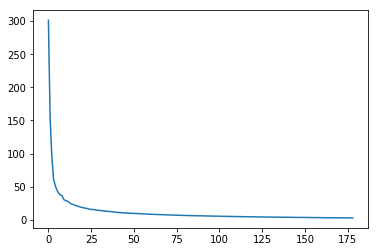

In [56]:
plt.plot(S2)

In [11]:
from numpy.linalg import matrix_rank

In [12]:
matrix_rank(m)

60

In [13]:
import sympy

In [14]:
_, inds = sympy.Matrix(m).T.rref()

In [17]:
m.shape

(60, 784)

In [24]:
lambdas, V =  np.linalg.eig(m.T)

In [8]:
widths = [60, 70, 80, 90]
print('METHOD, DIGIT, WIDTH, GTE_DIM, UPTO_DIM')
for digit in np.arange(0,10):
#     print("Calculating dimension for DIGIT: {}".format(digit))
    file_path = r'E:\phd\ae\data\mnist\input\x_train_{}.npy'.format(digit)
    x_train = np.load(file_path)
    gte_dims = []
    upto_dims = []
    for width in widths:
        for i in np.arange(1, 26):    
            row_indexes = get_random_indexes(x_train, width)
            m = x_train[row_indexes,:]
            U, S, V = np.linalg.svd(m)
            gte_dim = count_gt_threshold(S, threshold=0.01)
            upto_dim = count_upto_threshold(S, threshold=0.9)
            gte_dims.append(gte_dim)
            upto_dims.append(upto_dim)
        print('PCA, {}, {}, {}, {}'.format(digit, width, int(np.mean(gte_dims)), int(np.mean(upto_dims))))
#     print('----------------------------------------------------------')

METHOD, DIGIT, WIDTH, GTE_DIM, UPTO_DIM
PCA, 0, 60, 30, 42
PCA, 0, 70, 30, 45
PCA, 0, 80, 29, 48
PCA, 0, 90, 28, 51
PCA, 1, 60, 26, 37
PCA, 1, 70, 25, 40
PCA, 1, 80, 25, 43
PCA, 1, 90, 25, 46
PCA, 2, 60, 35, 44
PCA, 2, 70, 34, 47
PCA, 2, 80, 33, 50
PCA, 2, 90, 32, 54
PCA, 3, 60, 34, 43
PCA, 3, 70, 33, 47
PCA, 3, 80, 32, 50
PCA, 3, 90, 32, 53
PCA, 4, 60, 33, 43
PCA, 4, 70, 32, 46
PCA, 4, 80, 31, 50
PCA, 4, 90, 31, 53
PCA, 5, 60, 34, 44
PCA, 5, 70, 34, 47
PCA, 5, 80, 33, 50
PCA, 5, 90, 32, 53
PCA, 6, 60, 31, 42
PCA, 6, 70, 31, 45
PCA, 6, 80, 30, 48
PCA, 6, 90, 30, 51
PCA, 7, 60, 31, 42
PCA, 7, 70, 31, 45
PCA, 7, 80, 30, 48
PCA, 7, 90, 29, 51
PCA, 8, 60, 34, 43
PCA, 8, 70, 34, 47
PCA, 8, 80, 33, 50
PCA, 8, 90, 33, 53
PCA, 9, 60, 31, 42
PCA, 9, 70, 30, 45
PCA, 9, 80, 30, 48
PCA, 9, 90, 30, 51


### MDS

In [12]:
widths = [60, 70, 80, 90]
dimred_method = "MDS"
print('METHOD, DIGIT, WIDTH, GTE_DIM, UPTO_DIM')
for digit in np.arange(0,10):
#     print("Calculating dimension for DIGIT: {}".format(digit))
    file_path = r'E:\phd\ae\data\mnist\input\x_train_{}.npy'.format(digit)
    x_train = np.load(file_path)
    gte_dims = []
    upto_dims = []
    for width in widths:
        for i in np.arange(1, 26):    
            row_indexes = get_random_indexes(x_train, width)
            m = x_train[row_indexes,:]
            Y = manifold.MDS(n_components=width, max_iter=300, n_init=4).fit_transform(m)
            U, S, V = np.linalg.svd(Y)
            gte_dim = count_gt_threshold(S, threshold=0.01)
            upto_dim = count_upto_threshold(S, threshold=0.9)
            gte_dims.append(gte_dim)
            upto_dims.append(upto_dim)
#         print('{} WIDTH: {} GTE_DIM: {} UPTO_DIM: {}'.format(dimred_method, width, int(np.mean(gte_dims)), int(np.mean(upto_dims))))
        print('{}, {}, {}, {}, {}'.format(dimred_method, digit, width, int(np.mean(gte_dims)), int(np.mean(upto_dims))))
#     print('----------------------------------------------------------')

METHOD, DIGIT, WIDTH, GTE_DIM, UPTO_DIM
MDS, 0, 60, 40, 41
MDS, 0, 70, 40, 45
MDS, 0, 80, 40, 48
MDS, 0, 90, 38, 51
MDS, 1, 60, 35, 38
MDS, 1, 70, 34, 41
MDS, 1, 80, 34, 44
MDS, 1, 90, 33, 47
MDS, 2, 60, 43, 43
MDS, 2, 70, 43, 46
MDS, 2, 80, 43, 49
MDS, 2, 90, 41, 53
MDS, 3, 60, 43, 42
MDS, 3, 70, 43, 46
MDS, 3, 80, 42, 49
MDS, 3, 90, 41, 52
MDS, 4, 60, 42, 42
MDS, 4, 70, 42, 45
MDS, 4, 80, 41, 49
MDS, 4, 90, 40, 52
MDS, 5, 60, 42, 42
MDS, 5, 70, 42, 45
MDS, 5, 80, 42, 49
MDS, 5, 90, 40, 52
MDS, 6, 60, 41, 41
MDS, 6, 70, 40, 45
MDS, 6, 80, 39, 48
MDS, 6, 90, 38, 51
MDS, 7, 60, 40, 41
MDS, 7, 70, 40, 44
MDS, 7, 80, 40, 48
MDS, 7, 90, 38, 51
MDS, 8, 60, 43, 43
MDS, 8, 70, 43, 46
MDS, 8, 80, 42, 49
MDS, 8, 90, 41, 52
MDS, 9, 60, 40, 41
MDS, 9, 70, 40, 44
MDS, 9, 80, 39, 48
MDS, 9, 90, 38, 51


### ISOMAP

In [16]:
widths = [60, 70, 80, 90]
neighbors = [10, 20, 30, 40, 50]
dimred_method = "ISOMAP"

file = open(r"E:\phd\ae\data\mnist\isomap.txt", "w") 
file.write('METHOD, DIGIT, KNN, WIDTH, GTE_DIM, UPTO_DIM\n')
for digit in np.arange(0,10):
#     print("{} calculating dimension for DIGIT: {}".format(dimred_method, digit))
    file_path = r'E:\phd\ae\data\mnist\input\x_train_{}.npy'.format(digit)
    x_train = np.load(file_path)
    gte_dims = []
    upto_dims = []
    for width in widths:
        print('\tWIDTH: {}'.format(width))
        for neighbor in neighbors:
            for i in np.arange(1, 26):    
                row_indexes = get_random_indexes(x_train, width)
                m = x_train[row_indexes,:]
                try:
                    Y = manifold.Isomap(n_neighbors=neighbor, n_components=60).fit_transform(m)
                    Y = Y[:,~np.all(np.isnan(Y), axis=0)]                
                    U, S, V = np.linalg.svd(Y)
                except:
                    pass
                
                gte_dim = count_gt_threshold(S, threshold=0.01)
                upto_dim = count_upto_threshold(S, threshold=0.9)
                gte_dims.append(gte_dim)
                upto_dims.append(upto_dim)
            print('\t\tKNN: {} GTE_DIM: {} UPTO_DIM: {}'.format(neighbor,
                                                                int(np.mean(gte_dims)), 
                                                                int(np.mean(upto_dims))))
            str = '{}, {}, {}, {}, {}, {}\n'.format(dimred_method, digit, width, neighbor, 
                                                  int(np.mean(gte_dims)), int(np.mean(upto_dims)))
            file.write(str)
    print('----------------------------------------------------------')
    
file.close() 

	WIDTH: 60
		KNN: 10 GTE_DIM: 27 UPTO_DIM: 22


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 20 GTE_DIM: 28 UPTO_DIM: 23
		KNN: 30 GTE_DIM: 28 UPTO_DIM: 23
		KNN: 40 GTE_DIM: 28 UPTO_DIM: 23


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 50 GTE_DIM: 29 UPTO_DIM: 24
	WIDTH: 70


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 10 GTE_DIM: 29 UPTO_DIM: 24


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 20 GTE_DIM: 30 UPTO_DIM: 25


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 30 GTE_DIM: 30 UPTO_DIM: 25
		KNN: 40 GTE_DIM: 30 UPTO_DIM: 25


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 50 GTE_DIM: 31 UPTO_DIM: 26
	WIDTH: 80


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 10 GTE_DIM: 31 UPTO_DIM: 26


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 20 GTE_DIM: 31 UPTO_DIM: 26


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 30 GTE_DIM: 31 UPTO_DIM: 27
		KNN: 40 GTE_DIM: 32 UPTO_DIM: 27


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 50 GTE_DIM: 32 UPTO_DIM: 27
	WIDTH: 90


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 10 GTE_DIM: 32 UPTO_DIM: 28


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 20 GTE_DIM: 32 UPTO_DIM: 28


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 30 GTE_DIM: 33 UPTO_DIM: 28


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 40 GTE_DIM: 33 UPTO_DIM: 29
		KNN: 50 GTE_DIM: 33 UPTO_DIM: 29
----------------------------------------------------------
	WIDTH: 60

C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo


		KNN: 10 GTE_DIM: 25 UPTO_DIM: 21


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 20 GTE_DIM: 26 UPTO_DIM: 22
		KNN: 30 GTE_DIM: 27 UPTO_DIM: 23


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 40 GTE_DIM: 27 UPTO_DIM: 24
		KNN: 50 GTE_DIM: 28 UPTO_DIM: 25
	WIDTH: 70


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 10 GTE_DIM: 28 UPTO_DIM: 25


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 20 GTE_DIM: 28 UPTO_DIM: 25


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 30 GTE_DIM: 28 UPTO_DIM: 26
		KNN: 40 GTE_DIM: 29 UPTO_DIM: 26


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 50 GTE_DIM: 29 UPTO_DIM: 27
	WIDTH: 80


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 10 GTE_DIM: 29 UPTO_DIM: 27


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 20 GTE_DIM: 29 UPTO_DIM: 27


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 30 GTE_DIM: 29 UPTO_DIM: 27
		KNN: 40 GTE_DIM: 29 UPTO_DIM: 28


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 50 GTE_DIM: 30 UPTO_DIM: 28
	WIDTH: 90


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 10 GTE_DIM: 30 UPTO_DIM: 28


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 20 GTE_DIM: 30 UPTO_DIM: 28


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 30 GTE_DIM: 30 UPTO_DIM: 29


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 40 GTE_DIM: 30 UPTO_DIM: 29
		KNN: 50 GTE_DIM: 31 UPTO_DIM: 29
----------------------------------------------------------
	WIDTH: 60


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 10 GTE_DIM: 28 UPTO_DIM: 22
		KNN: 20 GTE_DIM: 28 UPTO_DIM: 23


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 30 GTE_DIM: 28 UPTO_DIM: 23
		KNN: 40 GTE_DIM: 29 UPTO_DIM: 24
		KNN: 50 GTE_DIM: 30 UPTO_DIM: 24
	WIDTH: 70


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 10 GTE_DIM: 30 UPTO_DIM: 25


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 20 GTE_DIM: 30 UPTO_DIM: 25


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 30 GTE_DIM: 31 UPTO_DIM: 25
		KNN: 40 GTE_DIM: 31 UPTO_DIM: 26


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 50 GTE_DIM: 31 UPTO_DIM: 26
	WIDTH: 80


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 10 GTE_DIM: 31 UPTO_DIM: 26


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 20 GTE_DIM: 32 UPTO_DIM: 27


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 30 GTE_DIM: 32 UPTO_DIM: 27
		KNN: 40 GTE_DIM: 32 UPTO_DIM: 27


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 50 GTE_DIM: 32 UPTO_DIM: 28
	WIDTH: 90


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 10 GTE_DIM: 33 UPTO_DIM: 28


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 20 GTE_DIM: 33 UPTO_DIM: 28


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 30 GTE_DIM: 33 UPTO_DIM: 29


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 40 GTE_DIM: 34 UPTO_DIM: 29
		KNN: 50 GTE_DIM: 34 UPTO_DIM: 29
----------------------------------------------------------
	WIDTH: 60


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 10 GTE_DIM: 28 UPTO_DIM: 23
		KNN: 20 GTE_DIM: 28 UPTO_DIM: 23


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 30 GTE_DIM: 28 UPTO_DIM: 23
		KNN: 40 GTE_DIM: 29 UPTO_DIM: 24
		KNN: 50 GTE_DIM: 30 UPTO_DIM: 25
	WIDTH: 70


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 10 GTE_DIM: 30 UPTO_DIM: 25


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 20 GTE_DIM: 30 UPTO_DIM: 25


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 30 GTE_DIM: 30 UPTO_DIM: 26
		KNN: 40 GTE_DIM: 31 UPTO_DIM: 26


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 50 GTE_DIM: 31 UPTO_DIM: 26
	WIDTH: 80


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 10 GTE_DIM: 31 UPTO_DIM: 26


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 20 GTE_DIM: 32 UPTO_DIM: 27


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 30 GTE_DIM: 32 UPTO_DIM: 27
		KNN: 40 GTE_DIM: 32 UPTO_DIM: 28


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 50 GTE_DIM: 32 UPTO_DIM: 28
	WIDTH: 90


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 10 GTE_DIM: 33 UPTO_DIM: 28


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 20 GTE_DIM: 33 UPTO_DIM: 28


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 30 GTE_DIM: 33 UPTO_DIM: 29


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 40 GTE_DIM: 34 UPTO_DIM: 29
		KNN: 50 GTE_DIM: 34 UPTO_DIM: 29
----------------------------------------------------------
	WIDTH: 60


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 10 GTE_DIM: 27 UPTO_DIM: 22
		KNN: 20 GTE_DIM: 28 UPTO_DIM: 23


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 30 GTE_DIM: 28 UPTO_DIM: 23
		KNN: 40 GTE_DIM: 29 UPTO_DIM: 23
		KNN: 50 GTE_DIM: 29 UPTO_DIM: 25
	WIDTH: 70


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 10 GTE_DIM: 30 UPTO_DIM: 25


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 20 GTE_DIM: 30 UPTO_DIM: 25


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 30 GTE_DIM: 30 UPTO_DIM: 25
		KNN: 40 GTE_DIM: 30 UPTO_DIM: 26


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 50 GTE_DIM: 31 UPTO_DIM: 26
	WIDTH: 80


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 10 GTE_DIM: 31 UPTO_DIM: 26


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 20 GTE_DIM: 31 UPTO_DIM: 27


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 30 GTE_DIM: 32 UPTO_DIM: 27
		KNN: 40 GTE_DIM: 32 UPTO_DIM: 27


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 50 GTE_DIM: 32 UPTO_DIM: 28
	WIDTH: 90


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 10 GTE_DIM: 32 UPTO_DIM: 28


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 20 GTE_DIM: 33 UPTO_DIM: 28


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 30 GTE_DIM: 33 UPTO_DIM: 29


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 40 GTE_DIM: 33 UPTO_DIM: 29
		KNN: 50 GTE_DIM: 34 UPTO_DIM: 29
----------------------------------------------------------
	WIDTH: 60


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 10 GTE_DIM: 27 UPTO_DIM: 22
		KNN: 20 GTE_DIM: 28 UPTO_DIM: 23


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 30 GTE_DIM: 28 UPTO_DIM: 23
		KNN: 40 GTE_DIM: 29 UPTO_DIM: 24
		KNN: 50 GTE_DIM: 30 UPTO_DIM: 25
	WIDTH: 70


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 10 GTE_DIM: 30 UPTO_DIM: 25


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 20 GTE_DIM: 30 UPTO_DIM: 25


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 30 GTE_DIM: 30 UPTO_DIM: 26
		KNN: 40 GTE_DIM: 31 UPTO_DIM: 26


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 50 GTE_DIM: 31 UPTO_DIM: 26
	WIDTH: 80


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 10 GTE_DIM: 31 UPTO_DIM: 27


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 20 GTE_DIM: 32 UPTO_DIM: 27


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 30 GTE_DIM: 32 UPTO_DIM: 27
		KNN: 40 GTE_DIM: 32 UPTO_DIM: 28


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 50 GTE_DIM: 32 UPTO_DIM: 28
	WIDTH: 90


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 10 GTE_DIM: 33 UPTO_DIM: 28


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 20 GTE_DIM: 33 UPTO_DIM: 28


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 30 GTE_DIM: 33 UPTO_DIM: 29


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 40 GTE_DIM: 33 UPTO_DIM: 29
		KNN: 50 GTE_DIM: 34 UPTO_DIM: 30
----------------------------------------------------------
	WIDTH: 60


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 10 GTE_DIM: 27 UPTO_DIM: 22
		KNN: 20 GTE_DIM: 28 UPTO_DIM: 23


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 30 GTE_DIM: 28 UPTO_DIM: 23
		KNN: 40 GTE_DIM: 29 UPTO_DIM: 23
		KNN: 50 GTE_DIM: 29 UPTO_DIM: 25
	WIDTH: 70


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 10 GTE_DIM: 29 UPTO_DIM: 25


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 20 GTE_DIM: 30 UPTO_DIM: 25


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 30 GTE_DIM: 30 UPTO_DIM: 25
		KNN: 40 GTE_DIM: 30 UPTO_DIM: 26


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 50 GTE_DIM: 31 UPTO_DIM: 26
	WIDTH: 80


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 10 GTE_DIM: 31 UPTO_DIM: 26


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 20 GTE_DIM: 31 UPTO_DIM: 27


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 30 GTE_DIM: 31 UPTO_DIM: 27
		KNN: 40 GTE_DIM: 32 UPTO_DIM: 27


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 50 GTE_DIM: 32 UPTO_DIM: 28
	WIDTH: 90


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 10 GTE_DIM: 32 UPTO_DIM: 28


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 20 GTE_DIM: 32 UPTO_DIM: 28


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 30 GTE_DIM: 33 UPTO_DIM: 28


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 40 GTE_DIM: 33 UPTO_DIM: 29
		KNN: 50 GTE_DIM: 33 UPTO_DIM: 29
----------------------------------------------------------
	WIDTH: 60


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 10 GTE_DIM: 27 UPTO_DIM: 22
		KNN: 20 GTE_DIM: 28 UPTO_DIM: 23


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 30 GTE_DIM: 28 UPTO_DIM: 23
		KNN: 40 GTE_DIM: 29 UPTO_DIM: 24
		KNN: 50 GTE_DIM: 29 UPTO_DIM: 25
	WIDTH: 70


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 10 GTE_DIM: 29 UPTO_DIM: 25


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 20 GTE_DIM: 30 UPTO_DIM: 25


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 30 GTE_DIM: 30 UPTO_DIM: 25
		KNN: 40 GTE_DIM: 30 UPTO_DIM: 26


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 50 GTE_DIM: 31 UPTO_DIM: 26
	WIDTH: 80


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 10 GTE_DIM: 31 UPTO_DIM: 26


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 20 GTE_DIM: 31 UPTO_DIM: 27


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 30 GTE_DIM: 31 UPTO_DIM: 27
		KNN: 40 GTE_DIM: 32 UPTO_DIM: 27


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 50 GTE_DIM: 32 UPTO_DIM: 28
	WIDTH: 90


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 10 GTE_DIM: 32 UPTO_DIM: 28


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 20 GTE_DIM: 32 UPTO_DIM: 28


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 30 GTE_DIM: 33 UPTO_DIM: 29


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 40 GTE_DIM: 33 UPTO_DIM: 29
		KNN: 50 GTE_DIM: 33 UPTO_DIM: 29
----------------------------------------------------------
	WIDTH: 60


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 10 GTE_DIM: 28 UPTO_DIM: 22
		KNN: 20 GTE_DIM: 28 UPTO_DIM: 23


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 30 GTE_DIM: 28 UPTO_DIM: 23
		KNN: 40 GTE_DIM: 29 UPTO_DIM: 24
		KNN: 50 GTE_DIM: 30 UPTO_DIM: 25
	WIDTH: 70


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 10 GTE_DIM: 30 UPTO_DIM: 25


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 20 GTE_DIM: 30 UPTO_DIM: 25


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 30 GTE_DIM: 30 UPTO_DIM: 26
		KNN: 40 GTE_DIM: 31 UPTO_DIM: 26


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 50 GTE_DIM: 31 UPTO_DIM: 26
	WIDTH: 80


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 10 GTE_DIM: 31 UPTO_DIM: 27


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 20 GTE_DIM: 32 UPTO_DIM: 27


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 30 GTE_DIM: 32 UPTO_DIM: 27
		KNN: 40 GTE_DIM: 32 UPTO_DIM: 28


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 50 GTE_DIM: 32 UPTO_DIM: 28
	WIDTH: 90


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 10 GTE_DIM: 33 UPTO_DIM: 28


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 20 GTE_DIM: 33 UPTO_DIM: 28


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 30 GTE_DIM: 33 UPTO_DIM: 29


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 40 GTE_DIM: 34 UPTO_DIM: 29
		KNN: 50 GTE_DIM: 34 UPTO_DIM: 29
----------------------------------------------------------
	WIDTH: 60


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 10 GTE_DIM: 27 UPTO_DIM: 22
		KNN: 20 GTE_DIM: 28 UPTO_DIM: 23


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 30 GTE_DIM: 28 UPTO_DIM: 23
		KNN: 40 GTE_DIM: 28 UPTO_DIM: 23
		KNN: 50 GTE_DIM: 29 UPTO_DIM: 25
	WIDTH: 70


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 10 GTE_DIM: 29 UPTO_DIM: 25


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 20 GTE_DIM: 30 UPTO_DIM: 25


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 30 GTE_DIM: 30 UPTO_DIM: 25
		KNN: 40 GTE_DIM: 30 UPTO_DIM: 26


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 50 GTE_DIM: 30 UPTO_DIM: 26
	WIDTH: 80


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 10 GTE_DIM: 31 UPTO_DIM: 26


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 20 GTE_DIM: 31 UPTO_DIM: 27


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 30 GTE_DIM: 31 UPTO_DIM: 27
		KNN: 40 GTE_DIM: 32 UPTO_DIM: 27


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 50 GTE_DIM: 32 UPTO_DIM: 28
	WIDTH: 90


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 10 GTE_DIM: 32 UPTO_DIM: 28


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 20 GTE_DIM: 32 UPTO_DIM: 28


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 30 GTE_DIM: 33 UPTO_DIM: 29


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

		KNN: 40 GTE_DIM: 33 UPTO_DIM: 29
		KNN: 50 GTE_DIM: 33 UPTO_DIM: 29
----------------------------------------------------------


C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\decomposition\kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transfo

### MNIST Auto Encoder Dimensionality

In [41]:
def sort_by_row(z):
    z_sorted = None
    for i in np.arange(z.shape[0]):
        z_s = sorted(z[i,:], reverse=True)
        if z_sorted is None:
            z_sorted = z_s
        else:
            z_sorted = np.vstack((z_sorted,z_s))
    return z_sorted

# use all the values, sort column wise independently and then take mean column wise
# if we were to take mean without sorting the result will be the same
def calc_column_wise_mean(m):
#     print('Inside calc_column_wise_mean: m shape {} x {}'.format(m.shape[0], m.shape[1]))
    z = abs(m)
#     print('Inside calc_column_wise_mean abs calculated')
    z = sort_by_row(z)         
#     print('Inside sort_by_row done')
    z = np.mean(z, axis=0) # col wise mean
#     print('Inside col wise mean done')
    z = sorted(z, reverse=True)   
    return z

In [47]:
def calculate_ae_dimension(digit, width):
    input_dir = r'E:\phd\ae\data\mnist\ROW-L2-NORM\width={}\norm-lambda-5e-06\output'.format(width)
    gte_dims = []
    upto_dims = []
    for iteration in np.arange(1, 25):
        try:
            file_name = '{}_{}_z_layer_l2_norm.dat'.format(digit, iteration)
            file_path = os.path.join(input_dir, file_name)
#             print('Reading: {}'.format(file_path))
            m = np.load(file_path)
#             print('Loaded successfully: {}'.format(file_path))
            z = calc_column_wise_mean(m)
#             print('calc_column_wise_mean successfully executed')
            gte_dim = count_gt_threshold(z, threshold=0.01)
            upto_dim = count_upto_threshold(z, threshold=0.9)
#             print('GTE_DIM: {} UPTO_DIM: {}'.format(gte_dim, upto_dim))
            gte_dims.append(gte_dim)
            upto_dims.append(upto_dim)        
        except:
            print("Digit: {} Iteration: {} file does not exist".format(digit, iteration))
    avg_gte_dim = int(np.mean(gte_dims))
    avg_upto_dim = int(np.mean(upto_dims))
    return avg_gte_dim, avg_upto_dim

In [45]:
avg_gte_dim, avg_upto_dim = calculate_ae_dimension(0, 60)

(22, 32)

In [57]:
for digit in np.arange(9,10):
# digit = 4
    widths = [60, 70, 80, 90]
    for width in widths:
        avg_gte_dim, avg_upto_dim = calculate_ae_dimension(digit, width)
        print('AE, {}, {}, {}, {}'.format(digit, width, avg_gte_dim, avg_upto_dim))

AE, 9, 60, 18, 30
AE, 9, 70, 17, 29
AE, 9, 80, 17, 29
AE, 9, 90, 17, 29


In [58]:
arr = np.load(r'E:\phd\ae\data\mnist\input\x_train_0.npy')

In [59]:
arr.shape

(5923, 784)

In [ ]:
def create_input_files(x, y, output_dir):
    for digit in np.arange(0,10):
        digit_index = np.where(y == digit)
        dir_path = os.path.join(output_dir, str(digit))
        if not os.path.exists(dir_path):
            os.makedirs(dir_path)
        all_digits = x[digit_index]
        for i in np.arange(len(all_digits)):
            arr = all_digits[i]
            index = digit_index[0][i]
            file_path = os.path.join(dir_path, str(digit) + "_" + str(index))
            np.save(file_path, arr)    

The two code blocks below are used to create input training and test files.

In [84]:
# create_input_files(x=x_train, 
#                    y=y_train, 
#                    output_dir = r'E:\phd\ae\data\mnist\train')

In [ ]:
# create_input_files(x=x_test, 
#                    y=y_test, 
#                    output_dir = r'E:\phd\ae\data\mnist\test')

The section tests if the input files are created correctly.

In [81]:
for digit in np.arange(0,10):
    dir_path = os.path.join(r'E:\phd\ae\data\mnist\train', str(digit))
    print("Processing....{}".format(digit))
    for f in os.listdir(dir_path):
        file_path = os.path.join(dir_path, f)
        arr = np.load(file_path)
        np.flatten(arr)
        print("Shape: {} x {}".format(arr.shape[0], arr.shape[1]))
        break

### Fashion-MNIST database of fashion articles

| Label	| Description |
|-------|-------------|
| 0	| T-shirt/top |
| 1	| Trouser |
| 2	| Pullover |
| 3	| Dress |
| 4	| Coat |
| 5	| Sandal |
| 6	| Shirt |
| 7	| Sneaker |
| 8	| Bag |
| 9	| Ankle boot |

In [93]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [94]:
create_input_files(x=x_train, 
                   y=y_train, 
                   output_dir = r'E:\phd\ae\data\fashion_mnist\train')

In [95]:
create_input_files(x=x_test, 
                   y=y_test, 
                   output_dir = r'E:\phd\ae\data\fashion_mnist\test')

In [17]:
from keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

57344/57026 [==============================] - 0s 1us/step


In [98]:
x_train.shape

(60000, 28, 28)

In [101]:
x_train.shape[2]

28